The purpose of analyzing the crab age dataset is to determine which feature(s) in the dataset can be used to predict crab age therefore, the exploratory data analysis will dive into which existing feature(s) or engineered feature(s) could best predict age.

In [195]:
#Import necessary modules
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
#Read in cleaned data from data wrangling step
crab_df = pd.read_csv('./cleaned_data/crab_age_cleaned.csv', index_col = 0)

In [3]:
#Check first few observations of dataframe to ensure read in was successful
crab_df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
0,0,I,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0
1,1,M,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0
2,2,I,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0
3,3,M,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0
4,4,M,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0


As a refresher, the crab age dataset contains the following features:

   - Sex : categorical 
   - Length : numeric 
   - Diameter : numeric 
   - Height : numeric 
   - Weight : numeric 
   - Shucked_Weight : numeric 
   - Viscera_Weight : numeric 
   - Age : numeric feature

In [4]:
#Review .info() to ensure no null values
crab_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49947 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              49947 non-null  int64  
 1   Sex             49947 non-null  object 
 2   Length          49947 non-null  float64
 3   Diameter        49947 non-null  float64
 4   Height          49947 non-null  float64
 5   Weight          49947 non-null  float64
 6   Shucked_Weight  49947 non-null  float64
 7   Viscera_Weight  49947 non-null  float64
 8   Shell_Weight    49947 non-null  float64
 9   Age             49947 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 4.2+ MB


The crab age dataframe contains no null values in any column so no filling in of missing data is required.

Since the dataset contains only 1 categorical feature, Gender, let's review this first. 

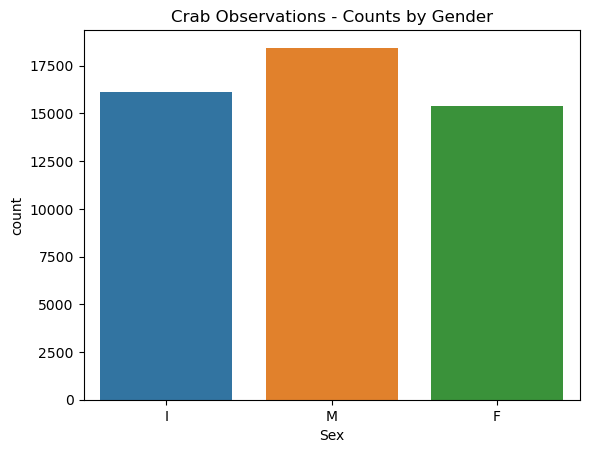

In [53]:
#Review distribution of gender using countplot
sns.countplot(data = crab_df, x = 'Sex')
plt.title('Crab Observations - Counts by Gender')
plt.show()

Without specific knowledge of the species of crabs sampled in the dataset, it is difficult to determine if the distribution of the Genders found in the dataset is representative of the actual crab population. With no specific knowledge, a relatively even representation of each Gender option - Indeterminate, Male, and Female- in the dataset seems reasonable.

Since the crab age dataset contains mostly numeric features, let's do a deeper dive into those.

In [6]:
#Create dataframe containing only numeric attributes
crab_df_num = crab_df.drop(columns = ['id', 'Sex'], axis =1)

In [7]:
#Check creation of numeric dataframe
crab_df_num.head()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
0,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0
1,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0
2,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0
3,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0
4,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0


In [9]:
#Review summary statistics of numeric features
crab_df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,49947.0,1.313981,0.295768,0.187500,1.137500,1.375000,1.537500,2.350000
Diameter,49947.0,1.021492,0.243462,0.100000,0.875000,1.062500,1.200000,1.637500
Height,49947.0,0.347421,0.093941,0.012500,0.287500,0.362500,0.412500,2.275000
Weight,49947.0,23.439088,13.184995,0.042524,13.040770,23.430862,32.446003,80.101512
Shucked_Weight,49947.0,10.132400,5.901043,0.028349,5.556502,9.823102,14.047177,49.810071
Viscera_Weight,49947.0,5.049084,2.912484,0.012814,2.721552,4.861939,7.016501,21.545620
Shell_Weight,49947.0,6.715670,3.722777,0.042524,3.827183,6.775531,9.100190,30.461538
Age,49947.0,9.978697,3.218412,1.000000,8.000000,10.000000,11.000000,29.000000


The .describe() function gives a nice overview of the summary statistics of the numeric features. This function neglects to include the mode, or most frequent value in each column, so this will be calculated separately below.

In [34]:
#Create empty list to hold mode of each numeric column
mode_list = []

#Review mode for numeric feature
for col in crab_df_num:
    mode_list.append(statistics.mode(crab_df_num[col]))


#Create a dataframe to house mode values for each column
mode_df = pd.DataFrame(mode_list, index = crab_df_num.columns, columns = ['mode'])

#Inspect mode_df
mode_df

,mode
Length,1.562500
Diameter,1.125000
Height,0.375000
Weight,6.307764
Shucked_Weight,2.721552
Viscera_Weight,4.861939
Shell_Weight,8.930093
Age,9.000000


Descriptive statistics like those found using .describe() and the mode function from the statistics package are helpful but can still be hard to gleam overall trends in numeric features. A visual is often more useful, let's now investigate the distribution of each numeric feature.

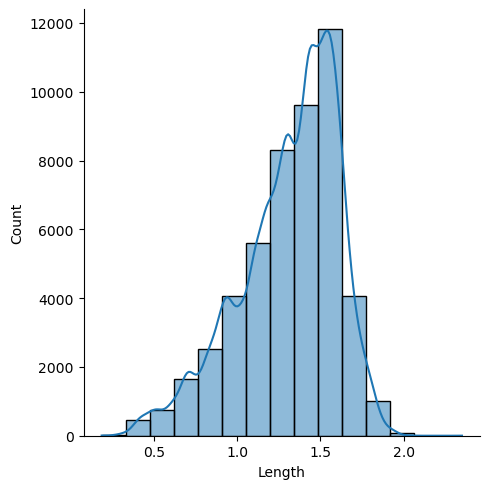

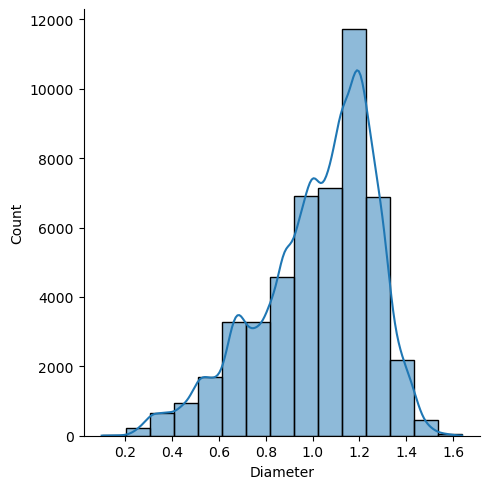

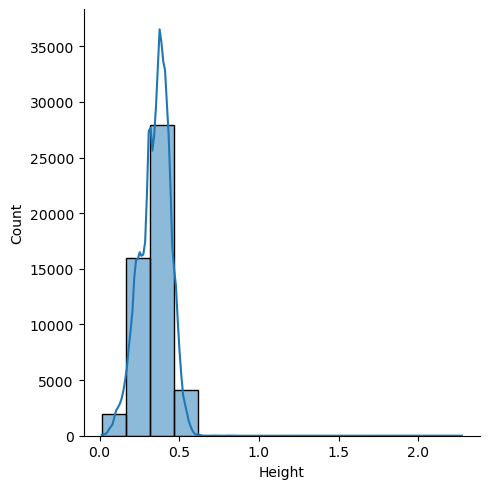

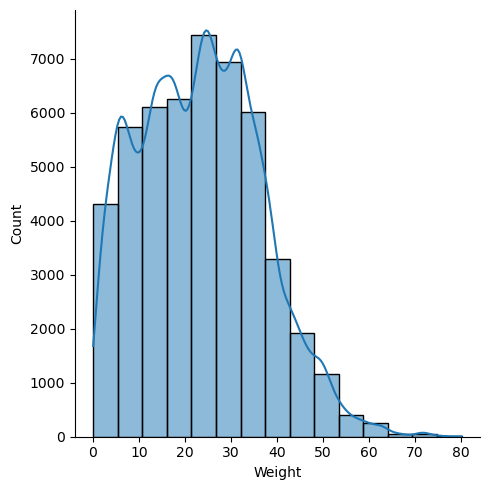

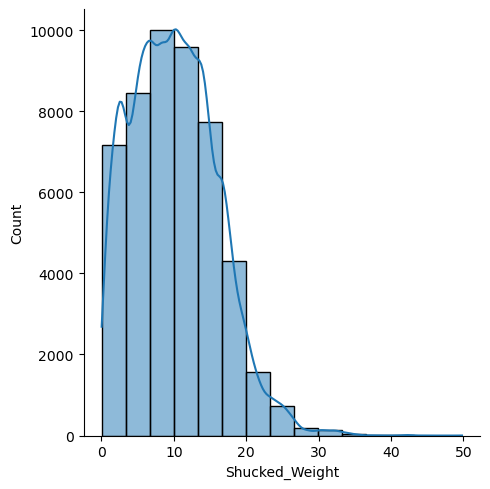

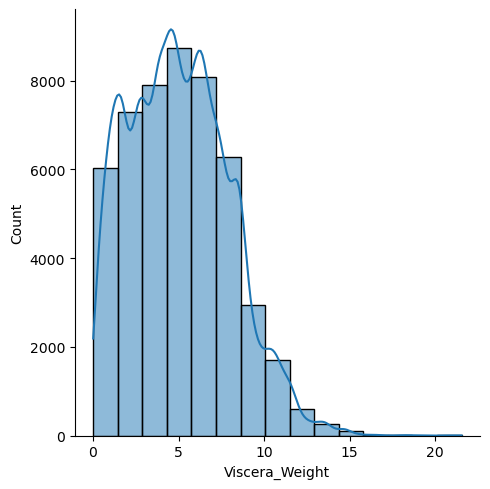

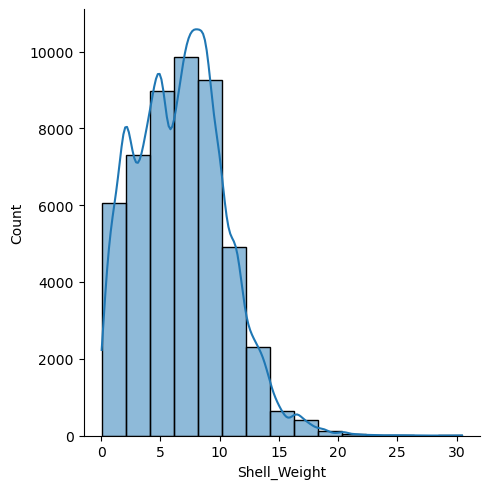

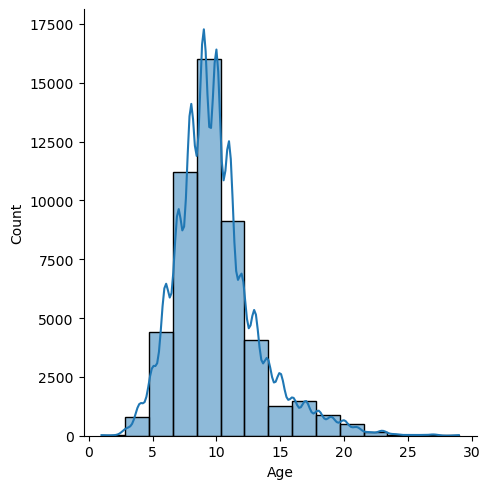

In [35]:
#Review distribution of each numeric variable in crab age dataset
for col in crab_df_num:
    sns.displot(crab_df_num, x = col, kde=True, bins=15)
    plt.show()

From these histograms, the distribution of each numeric variable is as follows:

   - Length : Negative skew (left-skewed distribution) 
   - Diameter : Negative skew (left-skewed distribution) 
   - Height : Normal distribution
   - Weight : Positive skew (right-skewed distribution)
   - Shucked_Weight : Positive skew (right-skewed distribution)
   - Viscera_Weight : Positive skew (right-skewed distribution)
   - Shelled_Weight : Positive skew (right-skewed distribution)
   - Age : Close to normal distribution with slight positive skew (right-skewed distribution)
   
Unfortunately, the dataset didn't contain any information about which species of crab were used to obtain these observations. They could all come from one type of crab or from a mixture. This makes it challenging to ascertain what a typical crab length or diameter should be and therefore judge if outliers are present/should be removed.

While distributions can be helpful to get an understanding of variable values, boxplots are probably most efficient at helping to identify outliers. Let's review a boxplot of each numeric variable to get a better feel for which observations may be outliers.

<AxesSubplot:xlabel='Weight'>

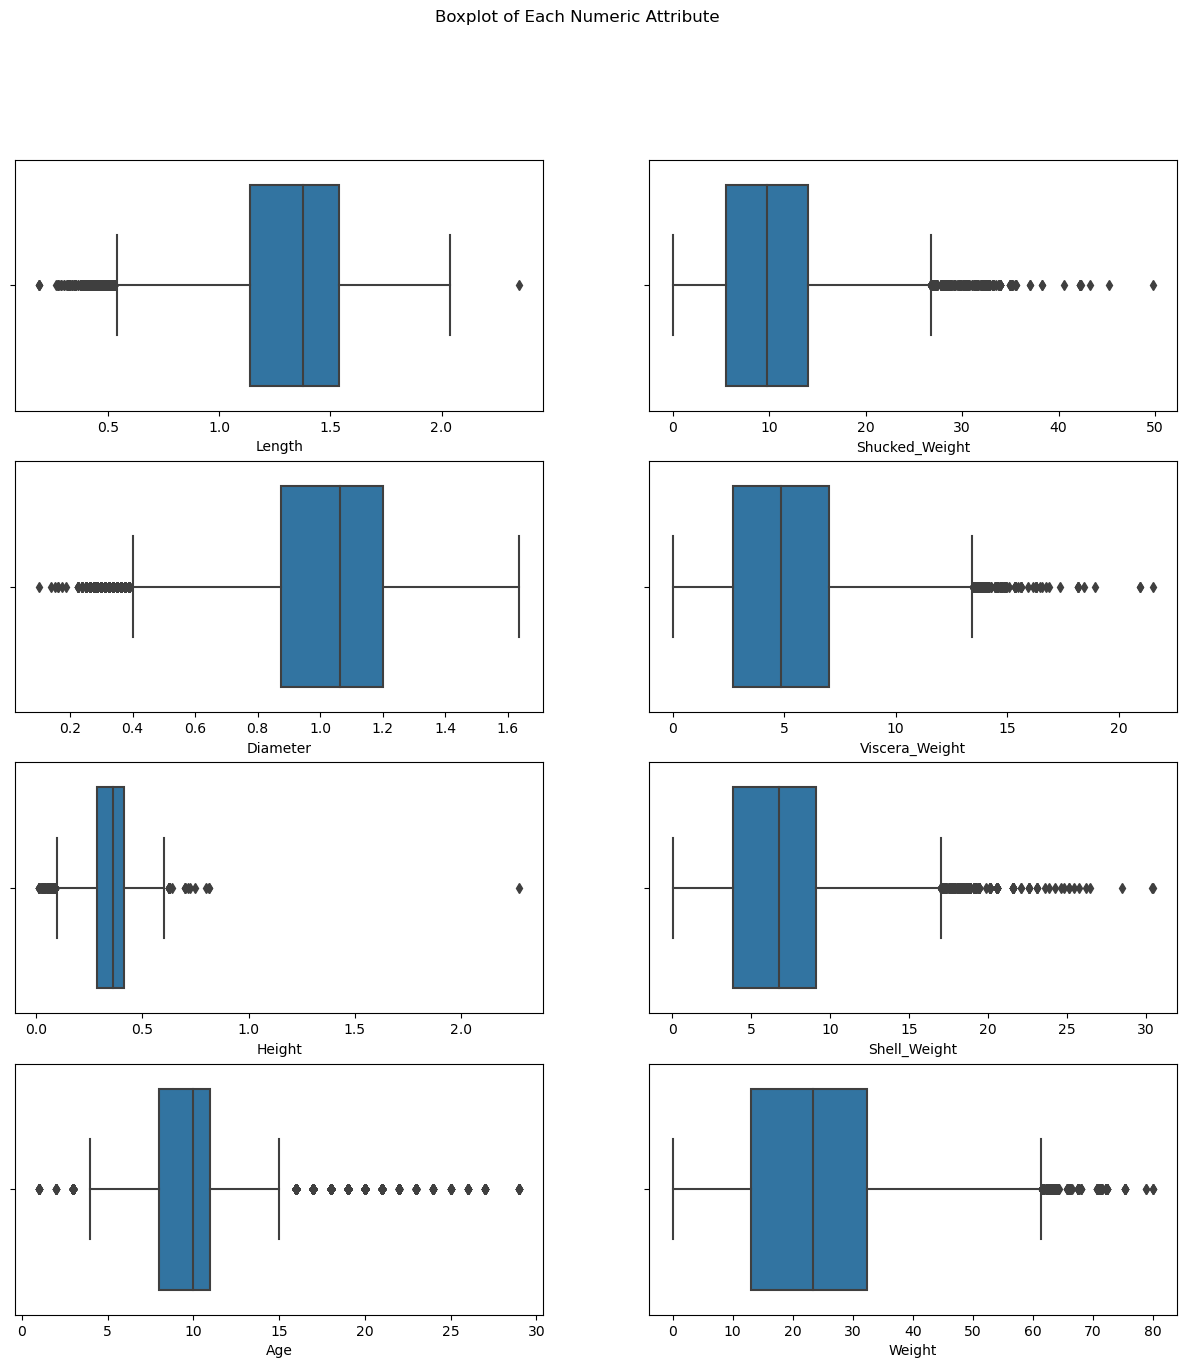

In [54]:
#Review boxplot of each numeric variable vs age

#Set-up subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Boxplot of Each Numeric Attribute')

#Define scatterplot variables
Length = crab_df_num['Length']
Diameter = crab_df_num['Diameter']
Height = crab_df_num['Height']
Weight = crab_df_num['Weight']
Shucked_Weight = crab_df_num['Shucked_Weight']
Viscera_Weight = crab_df_num['Viscera_Weight']
Shell_Weight = crab_df_num['Shell_Weight']
Age = crab_df_num['Age']

#1st column of subplots -Other Physical Attributes
sns.boxplot(ax = axes[0,0], x = Length)
sns.boxplot(ax = axes[1,0], x = Diameter)
sns.boxplot(ax = axes[2,0], x = Height)
sns.boxplot(ax = axes[3,0], x = Age) 

#2nd column of subplots -Weight related Attributes
sns.boxplot(ax = axes[0,1], x = Shucked_Weight)
sns.boxplot(ax = axes[1,1], x = Viscera_Weight)
sns.boxplot(ax = axes[2,1], x = Shell_Weight)
sns.boxplot(ax = axes[3,1], x = Weight)

Boxplots are a helpful method to look for outliers because they visually show a typical definition of an outlier in a dataset. Outliers can be defined using the interquartile approach as described below. <br> 

<br>

   - Upper bound for outliers: Q3 + 1.5 * IQR <br>
   - Lower bound for outliers: Q1 - 1.5 * IQR <br>
   
The whiskers of a boxplot made in seaborn like those above by default extend to 1.5 times below the 1st quartile value or 1.5 times above the 3rd quartile value (as demonstrated in the picture below).

Image Source: KDNuggets

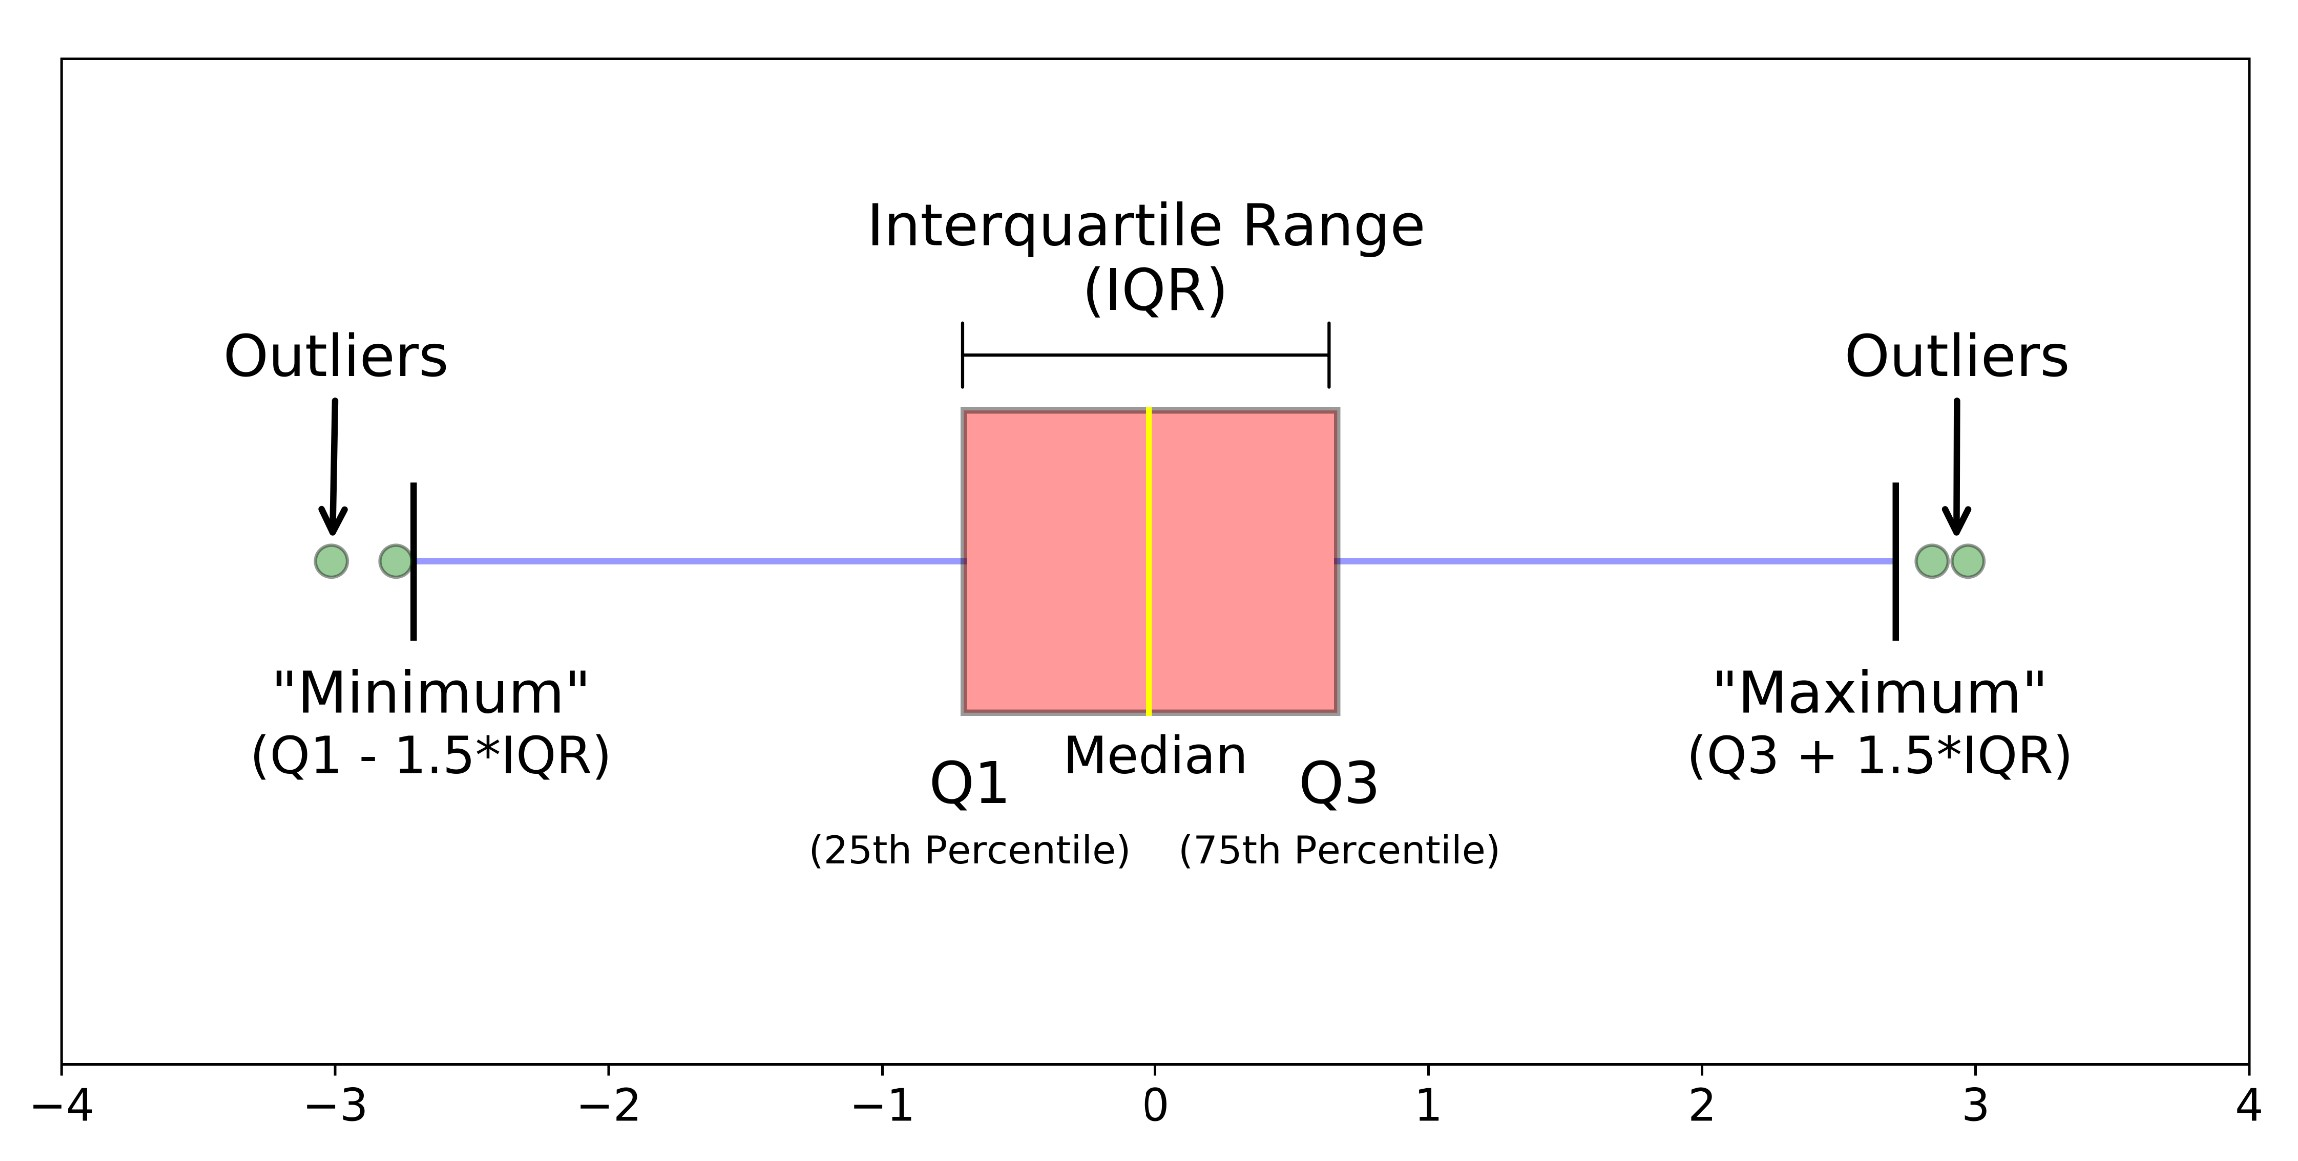

Based on this definition of outliers, each numeric variable in the dataset appears to have some outlier values. A summary of each variable's outliers and in which direction they lie - lower threshold (i.e. 1.5 times below the Q1 value) or upper threshold (i.e. 1.5 times above the Q3 value)- is listed below.

   - Length - Outliers present, mainly lower threshold, a few upper threshold
   - Diameter - Outliers present, lower threshold only
   - Height - Outliers present, lower & upper threshold
   - Age - Outliers present, lower & upper threshold
   - Shucked_Weight - Outliers present, upper threshold only
   - Viscera_Weight - Outliers present, upper threshold only
   - Shell_Weight - Outliers present, upper threshold only
   - Weight - Outliers present, upper threshold only

Before removing these outlier values, let's review the relationship between all of each individual numeric variable's values to Age using a simple visual - scatterplots.

<AxesSubplot:xlabel='Weight', ylabel='Age'>

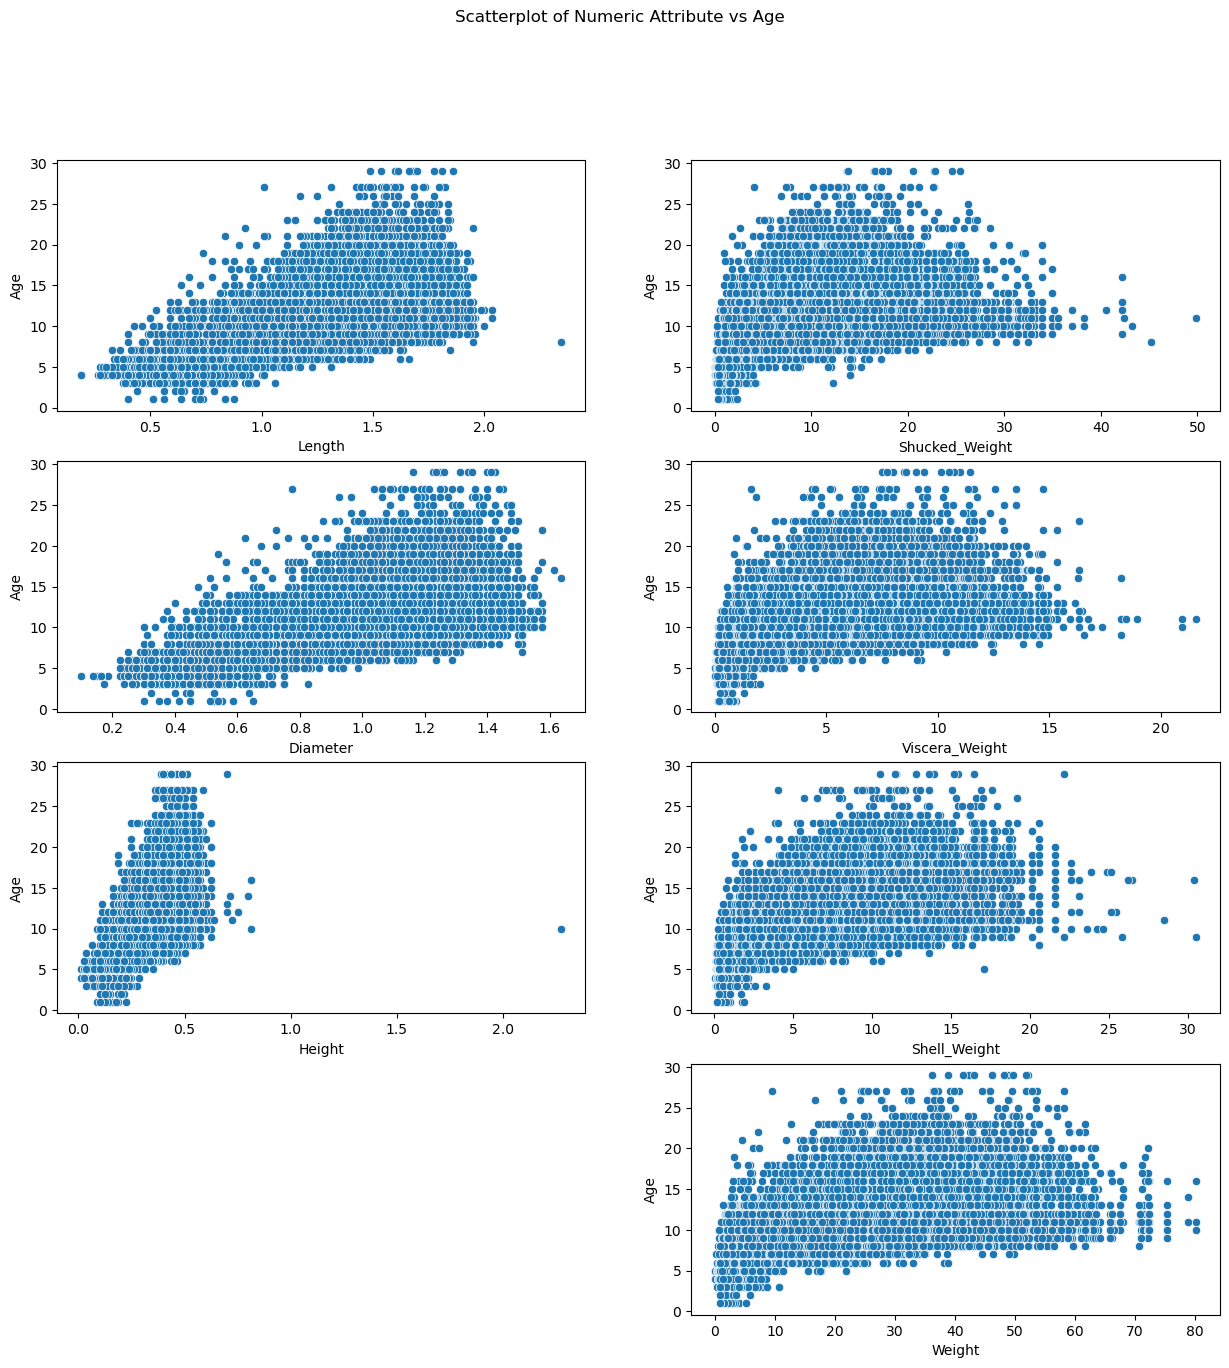

In [58]:
#Review scatterplot of each numeric variable vs age

#Set-up subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Scatterplot of Numeric Attribute vs Age')

#Define scatterplot variables
Length = crab_df_num['Length']
Diameter = crab_df_num['Diameter']
Height = crab_df_num['Height']
Weight = crab_df_num['Weight']
Shucked_Weight = crab_df_num['Shucked_Weight']
Viscera_Weight = crab_df_num['Viscera_Weight']
Shell_Weight = crab_df_num['Shell_Weight']
Age = crab_df_num['Age']

#1st column of subplots -Other Physical Attributes
sns.scatterplot(ax = axes[0,0], x = Length, y = Age)
sns.scatterplot(ax = axes[1,0], x = Diameter, y = Age)
sns.scatterplot(ax = axes[2,0], x = Height, y = Age)
fig.delaxes(ax = axes[3,0]) 

#2nd column of subplots -Weight related Attributes
sns.scatterplot(ax = axes[0,1], x = Shucked_Weight, y = Age)
sns.scatterplot(ax = axes[1,1], x = Viscera_Weight, y = Age)
sns.scatterplot(ax = axes[2,1], x = Shell_Weight, y = Age)
sns.scatterplot(ax = axes[3,1], x = Weight, y = Age)

From the scatterplots above, it definitely appears that each individual numeric variable has a somewhat linear relationship to Age but no single variable stands out as having the highest correlation. 

Let's make this a bit more quantitative by using a heatmap to review the correlation of each numeric variable to Age.

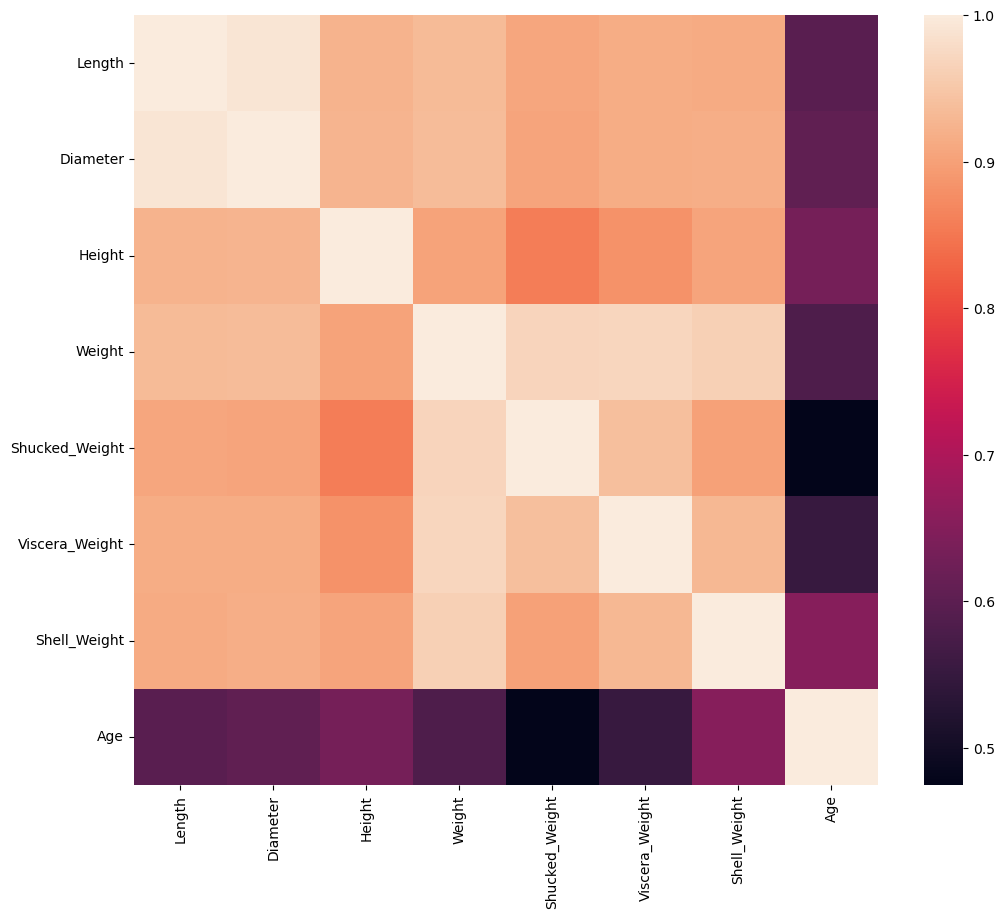

In [55]:
#Review correlation heatmap of numeric features in dataset
plt.subplots(figsize=(12,10))
sns.heatmap(crab_df_num.corr());

All of the numeric variables seem to have mild to moderate correlation to Age at best. Shucked weight appears to have the worst correlation to Age at ~0.5 however, the other variables only appear to have mild correlation around 0.6-0.7. 

Let's calculate the Pearson correlation coefficients for each numeric variable to Age to get a specific quantitative estimate of each variable's relationship to Age.

In [59]:
#Pearson correlation coefficient calculation
from scipy import stats

#Create a dictionary to hold Pearson correlation coefficient values for each column
pear_dict = {}

#For-loop to calculate Pearson correlation coefficient values for each column
for col in crab_df_num:
    pear_dict[col] = stats.pearsonr(crab_df_num[col], crab_df_num['Age'])[0] 

In [60]:
#Inspect dictionary containing Pearson correlation coefficient values for each column
pear_dict

{'Length': 0.5960985186490481,
 'Diameter': 0.6043038597852033,
 'Height': 0.6321588260850062,
 'Weight': 0.5831940352644707,
 'Shucked_Weight': 0.4746568413334597,
 'Viscera_Weight': 0.5520725863370491,
 'Shell_Weight': 0.6517741505538847,
 'Age': 1.0}

From the numeric calculation of Pearson correlation coefficient values, it appears that 'Shell_Weight', 'Height', and 'Diameter' have the strongest correlation to 'Age' ranging from 0.60-0.65. 'Length', 'Diameter', 'Weight' and 'Viscera_Weight' have lower Pearson correlation coefficients. 'Shucked_Weight' indeed has the lowest correlation at ~0.47.

Perhaps, no clear linear relationship is standing out because we've been looking at all data together and not considering Gender's impact. 

Let's review data by Gender to see if this makes a difference in investigating the linear relationships.

In [74]:
#Define dataframe of numerical crab attributes for male crabs only
crab_df_num_male = (crab_df.loc[crab_df['Sex'] == 'M']).drop(columns = ['id', 'Sex'], axis =1)

#Define dataframe of numerical crab attributes for female crabs only
crab_df_num_female = (crab_df.loc[crab_df['Sex'] == 'F']).drop(columns = ['id', 'Sex'], axis =1)

#Define dataframe of numerical crab attributes for indeterminate crabs only
crab_df_num_indeterminate = (crab_df.loc[crab_df['Sex'] == 'I']).drop(columns = ['id', 'Sex'], axis =1)

In [78]:
#Review first few observations of each dataframe to ensure created correctly

#Male gender only df
crab_df_num_male.head()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
1,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0
3,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0
4,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0
6,1.5125,1.2000,0.4125,32.786197,15.592225,6.350288,8.504850,9.0
7,1.5500,1.2250,0.4125,32.417653,12.204460,6.577084,10.347568,15.0


In [76]:
#Female gender only df
crab_df_num_female.head()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
9,1.5625,1.2500,0.4375,38.824640,15.592225,8.519025,13.792032,16.0
13,1.5875,1.2750,0.4500,35.819593,13.706983,8.249704,9.638830,10.0
16,1.2250,0.9750,0.3000,17.463292,7.243297,4.025629,4.677668,8.0
18,1.3250,1.0500,0.3750,20.638436,8.604073,4.309124,6.378637,8.0
19,1.6500,1.1875,0.5000,40.440562,17.080574,8.249704,9.071840,10.0


In [77]:
#Indeterminate gender only df
crab_df_num_indeterminate.head()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
0,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0
2,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0
5,1.1250,0.8875,0.2500,15.875720,6.733006,3.883882,4.961163,10.0
11,1.0875,0.8125,0.2750,10.460966,4.649318,1.814368,2.976698,7.0
14,1.2000,0.9375,0.3500,14.883487,6.733006,3.260193,4.394172,7.0


In [85]:
#Create a dictionary to hold Pearson correlation coefficient values for each column in Male only df
pear_dict_male = {}

#For-loop to calculate Pearson correlation coefficient values for each column in Male only df
for col in crab_df_num_male:
    pear_dict_male[col] = stats.pearsonr(crab_df_num_male[col], crab_df_num_male['Age'])[0] 

In [86]:
#Create a dictionary to hold Pearson correlation coefficient values for each column in Female only df
pear_dict_female = {}

#For-loop to calculate Pearson correlation coefficient values for each column
for col in crab_df_num_female:
    pear_dict_female[col] = stats.pearsonr(crab_df_num_female[col], crab_df_num_female['Age'])[0] 

In [87]:
#Create a dictionary to hold Pearson correlation coefficient values for each column in Indeterminate only df
pear_dict_indeterminate = {}

#For-loop to calculate Pearson correlation coefficient values for each column
for col in crab_df_num_indeterminate:
    pear_dict_indeterminate[col] = stats.pearsonr(crab_df_num_indeterminate[col], crab_df_num_indeterminate['Age'])[0] 

In [88]:
#Review each dictionary of Pearson correlation coefficients by Gender to see if linear relationships are stronger

#Male only gender Pearson correlation coefficients
pear_dict_male

{'Length': 0.3634473691397131,
 'Diameter': 0.37752907605606223,
 'Height': 0.4363779069096154,
 'Weight': 0.373564067133673,
 'Shucked_Weight': 0.22834426512260267,
 'Viscera_Weight': 0.3271037854051131,
 'Shell_Weight': 0.47865486450368455,
 'Age': 0.9999999999999694}

In [89]:
#Female only gender Pearson correlation coefficients
pear_dict_female

{'Length': 0.251714880218215,
 'Diameter': 0.26702472926461784,
 'Height': 0.34967567111723563,
 'Weight': 0.2876423370240286,
 'Shucked_Weight': 0.11442445059244448,
 'Viscera_Weight': 0.2367974169632175,
 'Shell_Weight': 0.41292592524201555,
 'Age': 0.9999999999999832}

In [90]:
#Indeterminate only gender Pearson correlation coefficients
pear_dict_indeterminate

{'Length': 0.6785892632349232,
 'Diameter': 0.6834610821738837,
 'Height': 0.6873363145211009,
 'Weight': 0.6922428034408082,
 'Shucked_Weight': 0.6180182074718106,
 'Viscera_Weight': 0.6775355227811388,
 'Shell_Weight': 0.7342992228046378,
 'Age': 0.9999999999999958}

Very interesting, from the results above- Gender definitely does appear to have an impact. Indeterminate gendered crabs have the highest Pearson correlation coefficients across all numeric attributes to Age followed by Males and then Females.

It seems as though moving forward our model will definitely need to take Gender of the crab into account to determine Age.

Let's return to removing outliers, below a function is made to identify outliers as defined by the 1.5 * IQR criteria discussed above. This can be run on each column of the dataframe to get an idea of how large of a proportion of the existing dataset can be interpreted as outliers by this definition.

In [117]:
def find_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    upper_array = df[df[col]>upper]
    lower_array = df[df[col]<lower]
    print("Upper Threshold Outliers:")
    print("Number of Upper Threshold Outliers:", len(upper_array.index), '\n')
    display(upper_array)
    print("Lower Threshold Outliers:")
    print("Number of Lower Threshold Outliers:", len(lower_array.index), '\n')
    display(lower_array)

In [118]:
#Reviewing outliers in each column of numeric df
for col in crab_df_num:
    print("\033[1m" + "Numeric Attribute: " + col + "\033[0m", '\n')
    find_outliers(crab_df_num, col)

Numeric Attribute: Length 

Upper Threshold Outliers:
Number of Upper Threshold Outliers: 1 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
14348,2.35,0.8875,0.325,16.513584,8.150481,3.869707,4.394172,8.0


Lower Threshold Outliers:
Number of Lower Threshold Outliers: 795 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
29,0.5250,0.4000,0.1250,1.204854,0.538640,0.340194,0.382718,7.0
101,0.4750,0.3250,0.1000,0.666213,0.354369,0.155922,0.255146,4.0
166,0.4125,0.2875,0.0125,0.595340,0.212621,0.141747,0.141747,4.0
239,0.5250,0.3750,0.1125,1.318252,0.680388,0.368544,0.481942,5.0
307,0.4750,0.5125,0.1875,2.820775,0.978058,0.354369,1.275727,4.0
...,...,...,...,...,...,...,...,...
49812,0.5000,0.3750,0.1625,0.935534,0.411068,0.340194,0.283495,6.0
49846,0.4875,0.3625,0.1250,0.907184,0.283495,0.226796,0.340194,5.0
49873,0.4750,0.3375,0.1125,1.488349,0.595340,0.155922,0.396893,5.0
49885,0.4500,0.3000,0.1375,0.836310,0.411068,0.212621,0.283495,4.0


Numeric Attribute: Diameter 

Upper Threshold Outliers:
Number of Upper Threshold Outliers: 0 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age


Lower Threshold Outliers:
Number of Lower Threshold Outliers: 808 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
101,0.4750,0.3250,0.1000,0.666213,0.354369,0.155922,0.255146,4.0
166,0.4125,0.2875,0.0125,0.595340,0.212621,0.141747,0.141747,4.0
239,0.5250,0.3750,0.1125,1.318252,0.680388,0.368544,0.481942,5.0
315,0.5875,0.3875,0.1875,1.800193,0.666213,0.396893,0.566990,5.0
333,0.4750,0.3625,0.1000,1.063106,0.425243,0.141747,0.297670,5.0
...,...,...,...,...,...,...,...,...
49812,0.5000,0.3750,0.1625,0.935534,0.411068,0.340194,0.283495,6.0
49846,0.4875,0.3625,0.1250,0.907184,0.283495,0.226796,0.340194,5.0
49873,0.4750,0.3375,0.1125,1.488349,0.595340,0.155922,0.396893,5.0
49885,0.4500,0.3000,0.1375,0.836310,0.411068,0.212621,0.283495,4.0


Numeric Attribute: Height 

Upper Threshold Outliers:
Number of Upper Threshold Outliers: 23 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
1296,1.6750,1.3500,0.7000,48.931237,24.536492,9.369510,13.834556,29.0
8506,1.8500,1.5000,0.6250,58.768513,22.679600,16.300963,16.867953,23.0
10736,1.8750,1.4125,0.6250,63.389482,23.430862,21.545620,17.590865,11.0
11962,1.5125,1.2500,0.8000,31.269499,12.332033,7.654365,11.056305,14.0
17067,1.6500,1.3375,0.6250,45.926190,17.860185,10.375917,13.352614,14.0
21631,1.8375,1.4750,0.7250,62.397250,29.653577,11.963489,16.017467,11.0
21673,1.9250,1.4125,0.6250,62.652395,22.523678,11.708343,21.545620,11.0
22225,1.6125,1.2750,0.6250,41.872211,16.130865,8.051258,10.489315,10.0
26685,1.7125,1.3750,0.6250,54.799583,17.619214,10.971257,17.718438,18.0
28512,1.8750,1.4375,0.6250,61.603463,31.609693,14.543294,15.209507,12.0


Lower Threshold Outliers:
Number of Lower Threshold Outliers: 258 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
166,0.4125,0.2875,0.0125,0.595340,0.212621,0.141747,0.141747,4.0
477,0.4000,0.2625,0.0875,0.510291,0.141747,0.099223,0.141747,4.0
911,0.4000,0.2750,0.0625,0.510291,0.212621,0.127573,0.141747,5.0
923,0.4000,0.3000,0.0750,0.425243,0.212621,0.127573,0.141747,4.0
1409,0.3500,0.2625,0.0250,0.411068,0.141747,0.099223,0.141747,4.0
...,...,...,...,...,...,...,...,...
48793,0.3875,0.2875,0.0625,0.836310,0.184272,0.170097,0.141747,4.0
48932,0.4000,0.3000,0.0625,0.510291,0.141747,0.127573,0.141747,4.0
48938,0.7875,0.6250,0.0375,4.649318,1.913591,1.091456,1.275727,5.0
49037,0.4000,0.3000,0.0625,0.595340,0.212621,0.127573,0.311845,4.0


Numeric Attribute: Weight 

Upper Threshold Outliers:
Number of Upper Threshold Outliers: 237 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
367,1.8375,1.4250,0.5250,67.500159,31.439595,14.132226,19.419407,11.0
695,1.9250,1.5000,0.5375,72.234526,31.226974,14.911837,16.584457,12.0
936,1.9375,1.4500,0.5250,70.661129,32.474352,13.125818,15.237856,11.0
980,1.8500,1.5125,0.5000,64.169093,25.089308,11.594945,17.562515,11.0
991,1.8875,1.4875,0.5500,75.324622,20.539213,14.911837,17.576690,11.0
...,...,...,...,...,...,...,...,...
49264,1.8375,1.4500,0.4750,62.652395,30.348140,11.609120,14.217274,13.0
49583,1.7750,1.3750,0.5250,61.603463,32.474352,11.254751,12.218635,11.0
49723,1.9375,1.5750,0.5750,80.101512,32.786197,18.427175,16.088341,11.0
49824,1.8125,1.4500,0.5250,62.652395,30.376489,9.412034,18.568922,14.0


Lower Threshold Outliers:
Number of Lower Threshold Outliers: 0 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age


Numeric Attribute: Shucked_Weight 

Upper Threshold Outliers:
Number of Upper Threshold Outliers: 343 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
86,1.7625,1.4125,0.4500,50.773955,27.825034,12.076887,12.927372,10.0
367,1.8375,1.4250,0.5250,67.500159,31.439595,14.132226,19.419407,11.0
516,1.8000,1.4375,0.5625,59.533950,28.661344,13.678634,17.066399,13.0
695,1.9250,1.5000,0.5375,72.234526,31.226974,14.911837,16.584457,12.0
936,1.9375,1.4500,0.5250,70.661129,32.474352,13.125818,15.237856,11.0
...,...,...,...,...,...,...,...,...
49321,1.7500,1.4125,0.5625,53.070264,27.187171,9.015141,11.765042,14.0
49583,1.7750,1.3750,0.5250,61.603463,32.474352,11.254751,12.218635,11.0
49723,1.9375,1.5750,0.5750,80.101512,32.786197,18.427175,16.088341,11.0
49824,1.8125,1.4500,0.5250,62.652395,30.376489,9.412034,18.568922,14.0


Lower Threshold Outliers:
Number of Lower Threshold Outliers: 0 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age


Numeric Attribute: Viscera_Weight 

Upper Threshold Outliers:
Number of Upper Threshold Outliers: 250 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
367,1.8375,1.4250,0.5250,67.500159,31.439595,14.132226,19.419407,11.0
516,1.8000,1.4375,0.5625,59.533950,28.661344,13.678634,17.066399,13.0
695,1.9250,1.5000,0.5375,72.234526,31.226974,14.911837,16.584457,12.0
991,1.8875,1.4875,0.5500,75.324622,20.539213,14.911837,17.576690,11.0
1215,1.9500,1.4875,0.5375,61.603463,25.783870,14.713390,18.710670,22.0
...,...,...,...,...,...,...,...,...
49221,1.8375,1.3875,0.4375,59.603463,28.831442,13.607760,14.514944,20.0
49316,1.8000,1.4375,0.4875,49.781722,18.242903,13.607760,18.625622,20.0
49346,1.8500,1.5000,0.5125,55.068904,25.472026,13.947954,13.891255,20.0
49723,1.9375,1.5750,0.5750,80.101512,32.786197,18.427175,16.088341,11.0


Lower Threshold Outliers:
Number of Lower Threshold Outliers: 0 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age


Numeric Attribute: Shell_Weight 

Upper Threshold Outliers:
Number of Upper Threshold Outliers: 360 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
109,1.7000,1.3750,0.5125,49.526576,21.332999,6.647958,18.852418,20.0
291,1.6250,1.3125,0.5000,39.816873,12.487955,6.010094,17.718438,17.0
367,1.8375,1.4250,0.5250,67.500159,31.439595,14.132226,19.419407,11.0
516,1.8000,1.4375,0.5625,59.533950,28.661344,13.678634,17.066399,13.0
575,1.6125,1.2750,0.5000,44.097647,14.855138,11.240577,17.576690,12.0
...,...,...,...,...,...,...,...,...
49207,1.6750,1.3625,0.4875,48.732791,21.899989,9.879801,19.419407,14.0
49316,1.8000,1.4375,0.4875,49.781722,18.242903,13.607760,18.625622,20.0
49718,1.8125,1.4250,0.5375,53.438808,18.086981,10.857859,18.427175,14.0
49824,1.8125,1.4500,0.5250,62.652395,30.376489,9.412034,18.568922,14.0


Lower Threshold Outliers:
Number of Lower Threshold Outliers: 0 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age


Numeric Attribute: Age 

Upper Threshold Outliers:
Number of Upper Threshold Outliers: 3101 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
9,1.5625,1.2500,0.4375,38.824640,15.592225,8.519025,13.792032,16.0
34,1.3250,1.0625,0.4125,24.380570,11.353975,4.861939,7.370870,17.0
37,1.4375,1.1500,0.4125,28.094355,10.772810,5.173784,9.922325,17.0
76,1.2250,0.9750,0.4000,21.970862,6.647958,4.578444,5.244657,20.0
77,1.4875,1.1375,0.4625,35.692020,15.067759,8.405627,11.623295,18.0
...,...,...,...,...,...,...,...,...
49895,1.5125,1.1875,0.4000,28.547946,13.111644,5.457279,8.646598,16.0
49916,1.5250,1.2000,0.4250,29.270859,12.289508,7.399220,8.221355,16.0
49917,1.5875,1.2625,0.4750,35.692020,14.217274,5.627376,10.489315,20.0
49970,1.5500,1.3250,0.3750,32.431828,10.404267,6.690482,8.193005,20.0


Lower Threshold Outliers:
Number of Lower Threshold Outliers: 167 



,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
435,0.6625,0.5250,0.1500,2.764076,1.275727,0.623689,0.992232,3.0
1036,0.9250,0.6500,0.2000,6.137667,2.565630,1.176504,1.984465,3.0
1209,0.7500,0.5500,0.2000,3.316892,1.275727,0.807961,0.850485,3.0
1210,0.5250,0.3750,0.1000,1.190679,0.566990,0.269320,0.311845,3.0
1411,0.7000,0.5250,0.1500,3.090095,1.474174,0.779611,0.992232,3.0
...,...,...,...,...,...,...,...,...
48324,0.5375,0.4500,0.1625,3.968930,1.346601,0.354369,0.566990,3.0
48352,0.7000,0.5375,0.2000,3.713785,1.417475,0.893009,0.978058,3.0
49641,0.9750,0.7125,0.2375,8.660772,4.209901,1.573397,2.551455,3.0
49670,0.8125,0.6250,0.2125,4.096503,1.715145,0.963883,1.275727,3.0


Compared to the relative size of the dataset, ~50,000 observations, the number of outliers identified for each variable is fairly trivial. Age had the largest number of outliers with ~3400 combined upper and lower threshold outliers.

In the worst case scenario, if each indentified outlier per variable was unique  - i.e. an outlier for one numeric variable Age wasn't contained in the same observation as an outlier identified for another numeric variable like Weight- through removal of all outliers we would only be loosing 6,343 observations. Again, in relation to the number of observations in the dataframe this is trivial and we would still have ~43,600 observations remaining to use for modelling.

Since enough data will still be present to adequately model with outliers removed, outliers as defined by 1.5 * IQR range method described above will be removed from each column.

In [136]:
#Removing outliers as defined by 1.5 * IQR method
Q1 = crab_df_num.quantile(0.25)
Q3 = crab_df_num.quantile(0.75)
IQR = Q3 - Q1

crab_df_outliers_removed = crab_df_num[~((crab_df_num < (Q1 - 1.5 * IQR)) |(crab_df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

In [137]:
#Review crab_df_outliers_removed df
crab_df_outliers_removed.head()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
0,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0
1,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0
2,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0
3,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0
4,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0


In [138]:
#Checking number of observations removed
crab_df_outliers_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45355 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          45355 non-null  float64
 1   Diameter        45355 non-null  float64
 2   Height          45355 non-null  float64
 3   Weight          45355 non-null  float64
 4   Shucked_Weight  45355 non-null  float64
 5   Viscera_Weight  45355 non-null  float64
 6   Shell_Weight    45355 non-null  float64
 7   Age             45355 non-null  float64
dtypes: float64(8)
memory usage: 3.1 MB


In [139]:
#Check the index of new outliers removed dataframe, it is still from 0 to 49999 like original df so this will need to be changed
crab_df_outliers_removed.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,    10,
       ...
       49990, 49991, 49992, 49993, 49994, 49995, 49996, 49997, 49998, 49999],
      dtype='int64', length=45355)

In [140]:
#Merge outliers removed df with original df to include ID and Gender data
crab_df_cleaned = crab_df.merge(crab_df_outliers_removed, how = 'inner', left_on = crab_df.index, right_on = crab_df_outliers_removed.index)

In [141]:
#Review new cleaned df, need to remove duplicate columns
crab_df_cleaned.head()

,key_0,id,Sex,Length_x,Diameter_x,Height_x,Weight_x,Shucked_Weight_x,Viscera_Weight_x,Shell_Weight_x,Age_x,Length_y,Diameter_y,Height_y,Weight_y,Shucked_Weight_y,Viscera_Weight_y,Shell_Weight_y,Age_y
0,0,0,I,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0
1,1,1,M,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0
2,2,2,I,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0
3,3,3,M,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0
4,4,4,M,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0


In [142]:
#Remove duplicate columns from merge
crab_df_cleaned = crab_df_cleaned.drop(['key_0', 'Length_y', 'Diameter_y', 'Height_y', 'Weight_y', 'Shucked_Weight_y', 'Viscera_Weight_y', 'Shell_Weight_y', 'Age_y'], axis = 1)

In [143]:
#Review removal of columns
crab_df_cleaned.head()

,id,Sex,Length_x,Diameter_x,Height_x,Weight_x,Shucked_Weight_x,Viscera_Weight_x,Shell_Weight_x,Age_x
0,0,I,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0
1,1,M,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0
2,2,I,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0
3,3,M,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0
4,4,M,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0


In [146]:
#Remove suffix from column names
crab_df_cleaned = crab_df_cleaned.rename(columns = {'Length_x':'Length', 'Diameter_x' :'Diameter', 'Height_x' : 'Height', 'Weight_x' : 'Weight', 'Shucked_Weight_x' : 'Shucked_Weight', 'Viscera_Weight_x' :'Viscera_Weight', 'Shell_Weight_x' :'Shell_Weight', 'Age_x' :'Age'})

In [147]:
#Review renamed column names
crab_df_cleaned.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
0,0,I,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980,5.0
1,1,M,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600,8.0
2,2,I,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271,6.0
3,3,M,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365,10.0
4,4,M,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665,9.0


In [148]:
#Reset index values from 0 to 45355
crab_df_cleaned = crab_df_cleaned.reset_index()

In [149]:
#Check info to ensure resetting of index was successful
crab_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45355 entries, 0 to 45354
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           45355 non-null  int64  
 1   id              45355 non-null  int64  
 2   Sex             45355 non-null  object 
 3   Length          45355 non-null  float64
 4   Diameter        45355 non-null  float64
 5   Height          45355 non-null  float64
 6   Weight          45355 non-null  float64
 7   Shucked_Weight  45355 non-null  float64
 8   Viscera_Weight  45355 non-null  float64
 9   Shell_Weight    45355 non-null  float64
 10  Age             45355 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 3.8+ MB


Since none of the individual numeric variables seemed to have a high correlation to Age, even when faceted by Gender, this means the best way to model the relationship between these attributes and Age will be to incorporate multiple attributes into our model. But which variable(s) will be most valuable to describe Age?

To help disentangle some of the relationships between the numeric variables and Age, let's perform a principle component analysis (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. These derived features can then be used to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. Finally, we can examine how the original features contribute to these derived features.

The basic steps of a PCA analysis are below:
<br>
<br>
1.) Scale the data <br>
2.) Fit the PCA transform <br>
3.) Apply the transformation to the data to create derived features <br>
4.) Use derived features to look for patterns in the data and explore the coefficients <br>

In [171]:
#Scaling the data
#First we need to prepare the df to keep only numeric data, using ID as index to keep track of observations
crab_df_PCA = crab_df_cleaned.set_index('id').drop(['index', 'Sex', 'Age'], axis = 1)

crab_df_PCA.head()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
id,,,,,,,
0,0.8125,0.6250,0.1625,5.244657,2.423882,1.119805,1.133980
1,1.1750,0.9250,0.2875,13.366789,5.556502,2.806601,4.266600
2,0.8500,0.6500,0.2500,5.301356,2.679028,1.190679,1.644271
3,1.3375,1.0875,0.4125,26.322511,10.999606,6.562909,7.654365
4,1.7000,1.3000,0.4250,44.225220,24.678240,9.043491,10.517665


In [172]:
#Save column names of df before scaling as when scaling this only creates a numpy array & column names get lost
crab_df_PCA.columns = crab_df_PCA.columns

#Scale the numeric data
crab_df_PCA_scaled = scale(crab_df_PCA)

In [173]:
#Review scaled data
crab_df_PCA_scaled

array([[-1.83450478, -1.75403099, -2.12701635, ..., -1.35974661,
        -1.3947844 , -1.58892059],
       [-0.50265649, -0.41884883, -0.66739704, ..., -0.793792  ,
        -0.77608194, -0.65433234],
       [-1.69672737, -1.64276581, -1.10528283, ..., -1.31365076,
        -1.3687885 , -1.43667997],
       ...,
       [ 0.00252734,  0.08184448,  0.06241262, ..., -0.03833223,
        -0.34454997,  0.22950903],
       [-1.28339515, -1.36460286, -1.54316862, ..., -1.2163373 ,
        -1.13482538, -1.2506081 ],
       [ 0.09437895,  0.13747707, -0.08354931, ..., -0.31746821,
         0.28975004, -0.06651439]])

In [174]:
#Make scaled data a dataframe using saved column name values to make inspection easier
scaled_df = pd.DataFrame(crab_df_PCA_scaled, columns = crab_df_PCA.columns)

scaled_df.head()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
0,-1.834505,-1.754031,-2.127016,-1.434563,-1.359747,-1.394784,-1.588921
1,-0.502656,-0.418849,-0.667397,-0.768712,-0.793792,-0.776082,-0.654332
2,-1.696727,-1.642766,-1.105283,-1.429915,-1.313651,-1.368788,-1.436680
3,0.094379,0.304375,0.792222,0.293396,0.189586,0.601701,0.356376
4,1.426227,1.250129,0.938184,1.761058,2.660836,1.511557,1.210615


In [175]:
#Check scaling was completed appropriately
#Check the mean of each column in the dataframe- values should be approximately 0
scaled_df.mean()

Length           -4.699875e-17
Diameter         -7.421102e-16
Height            1.253300e-16
Weight           -1.953581e-16
Shucked_Weight    2.146276e-17
Viscera_Weight   -1.023006e-16
Shell_Weight     -1.178102e-16
dtype: float64

In [176]:
#Check the std of each column in the dataframe (using ddof = 0 as our dataset is from a sample, not an entire population)
#Values should be 1.0
scaled_df.std(ddof = 0)

Length            1.0
Diameter          1.0
Height            1.0
Weight            1.0
Shucked_Weight    1.0
Viscera_Weight    1.0
Shell_Weight      1.0
dtype: float64

In [177]:
#Fit the PCA transformation using the scaled data, default is to use n_components equal to number of features, this case is 7
crab_pca = PCA().fit(scaled_df)

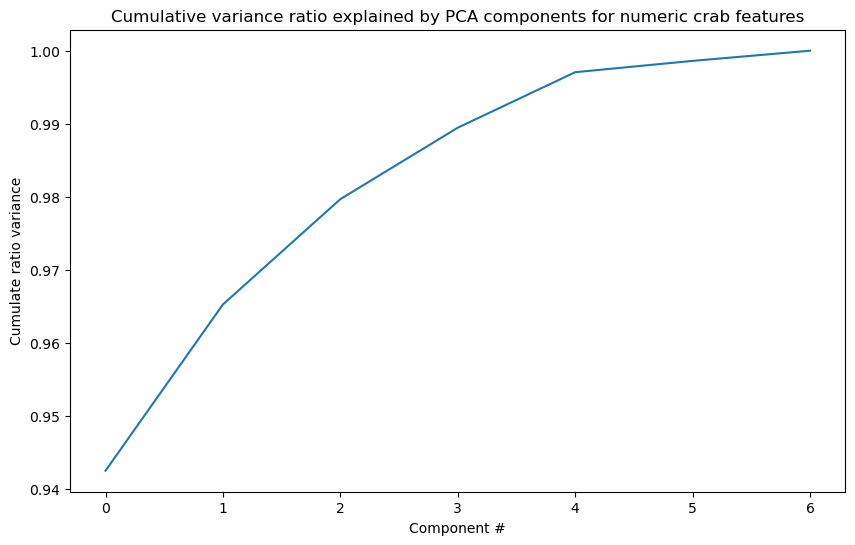

In [178]:
#Plot the cumulative variance ratio with the number of components
plt.subplots(figsize=(10, 6))
plt.plot(crab_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulate ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for numeric crab features');

Interesting, it seems like scaling the data may have made the relationships clearer- which makes sense since the distribution of a few of our numeric variable values were quite skewed.

2 variables accounts for almost 97% of the variance. 5 variables accounts for ~ 99 % of the variance. With so many of the numeric features being relevant to Weight, I guess this isn't terribly surprising. 

In [179]:
#Transform the data
crab_PCA_x = crab_pca.transform(scaled_df)

In [180]:
#Check shape of crab_PCA transform output
crab_PCA_x.shape

(45355, 7)

In [184]:
#Review cumulative sum of the explained variance per each additional component included
print(crab_pca.explained_variance_ratio_.cumsum() * 100)

[ 94.24576727  96.52376759  97.96653331  98.94560411  99.70578507
  99.86093452 100.        ]


With the existing features being able to explain so much of the variance in the dataset, this seems very promising for the modelling to come. Let's save the crab_df_cleaned where outliers were removed so we can pick up in the next with data pre-processing.

In [196]:
#Save crab_df_cleaned df where outliers were removed
crab_df_cleaned.to_csv('./cleaned_data/crab_df_eda.csv')